<a href="https://colab.research.google.com/github/panghanwu/pytorch_example/blob/main/bicycle_sharing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim


In [3]:
data_path = 'hour.csv'
rides = pd.read_csv(data_path)
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Simple Time Sequence 

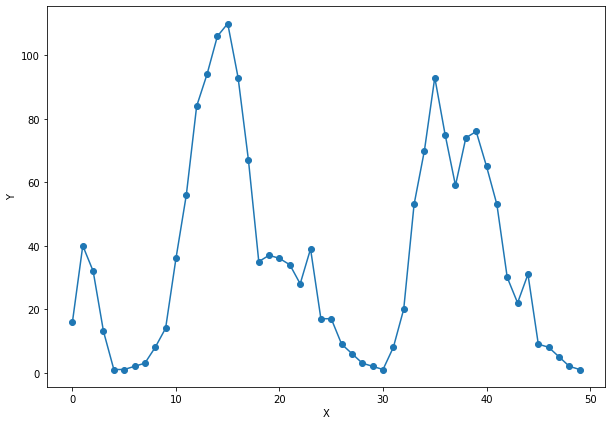

In [45]:
counts = rides['cnt'][:50]

x = np.arange(len(counts))
y = np.array(counts)

plt.figure(figsize=(10,7))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [53]:
counts = rides['cnt'][:50]

x = torch.tensor(np.arange(len(counts), dtype=float), requires_grad=True)
y = torch.tensor(np.array(counts, dtype=float), requires_grad=True)

# num of perception in hidden layer
sz = 10

# initialize
weights  = torch.randn((1, sz), dtype=torch.double, requires_grad=True)
biases   = torch.randn(sz, dtype=torch.double, requires_grad=True)
weights2 = torch.randn((sz, 1), dtype=torch.double, requires_grad=True)

learning_rate = 0.0001
losses = []

x = x.view(50, -1)
y = y.view(50, -1)

for i in range(1000000):
    hidden = x * weights + biases
    hidden = torch.sigmoid(hidden)

    predictions = hidden.mm(weights2)

    loss = torch.mean((predictions-y)**2)
    losses.append(loss.data.numpy())

    if i%100000 == 0:
        print('loss:', loss)

    # backpropagation
    loss.backward()

    weights.data.add_(-learning_rate*weights.grad.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)

    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss: tensor(2354.9561, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(775.8590, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(524.9440, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(468.8447, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(458.8520, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(456.6744, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(456.0796, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(455.8688, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(455.7670, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(455.7016, dtype=torch.float64, grad_fn=<MeanBackward0>)


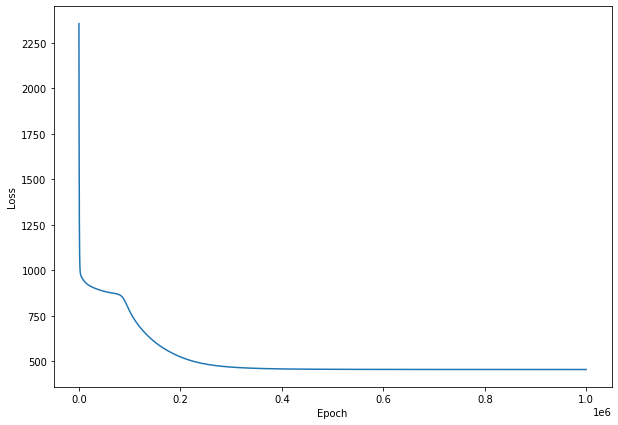

In [54]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

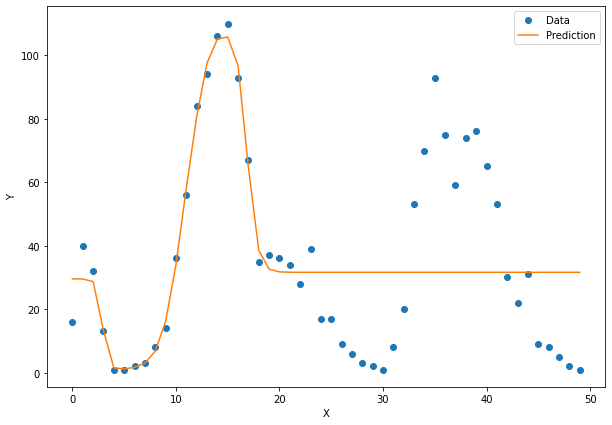

In [55]:
x_data = x.data.numpy()

plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, predictions.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', 'Prediction'])

plt.show()

# Normalized Data

The large range of input data will make gradient of sigmiod fuction too small to be traind. A good way is to normalize input data into [0, 1].

In [64]:
counts = rides['cnt'][:50]

x = np.arange(len(counts), dtype=float) / len(counts)
x = torch.tensor(x, requires_grad=True) 

y = np.array(counts, dtype=float)
y = torch.tensor(y, requires_grad=True)

# num of perception in hidden layer
sz = 10

# initialize
weights  = torch.randn((1, sz), dtype=torch.double, requires_grad=True)
biases   = torch.randn(sz, dtype=torch.double, requires_grad=True)
weights2 = torch.randn((sz, 1), dtype=torch.double, requires_grad=True)

learning_rate = 0.0001
losses = []

x = x.view(50, -1)
y = y.view(50, -1)

for i in range(1000000):
    hidden = x * weights + biases
    hidden = torch.sigmoid(hidden)

    predictions = hidden.mm(weights2)

    loss = torch.mean((predictions-y)**2)
    losses.append(loss.data.numpy())

    if i%100000 == 0:
        print('loss:', loss)

    # backpropagation
    loss.backward()

    weights.data.add_(-learning_rate*weights.grad.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)

    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss: tensor(2170.1096, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(897.7958, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(619.6306, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(447.7970, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(220.2770, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(119.5124, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(76.8275, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(58.9721, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(50.1181, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(45.4337, dtype=torch.float64, grad_fn=<MeanBackward0>)


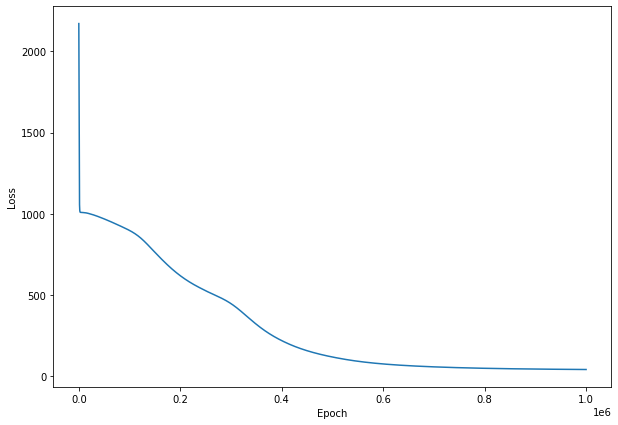

In [65]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

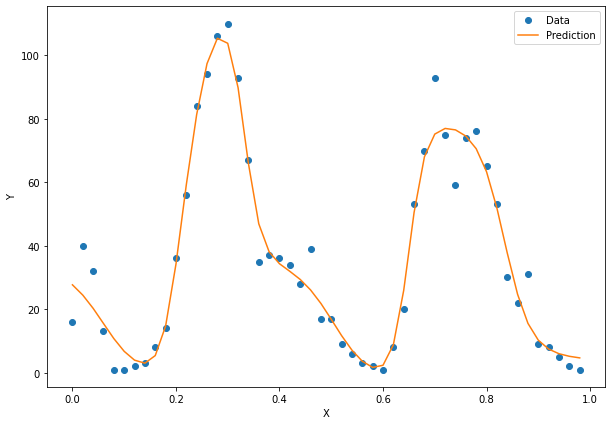

In [66]:
x_data = x.data.numpy()

plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, predictions.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', 'Prediction'])

plt.show()